# Train and evaluate models

This notebooks shows how to train, predict and cluster models. Alternatively to executing each step here, the cli can be used for training models:
```
python train.py all --config params/example_experiment_params.py
```

for evaluation or comparison only, use
```
python train.py compare --experiment-dir test
```

In [4]:
import logging

logging.basicConfig(level=logging.INFO)

from campa.tl import (
    Cluster,
    Estimator,
    Predictor,
    Experiment,
    ModelComparator,
    run_experiments,
)
from campa.constants import EXPERIMENT_DIR, get_data_config

data_config = get_data_config("TestData")
print(EXPERIMENT_DIR)

/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new


## Experiment class handles config files
For training and evaluating models, an experiment_params file is used. This file contains several model/experiment parameters for easy training of several models at the same time. The parameter dictionaries contain several sections:
- experiment (where to save experiment)
- data (which dataset to use for training)
- model (model class definition)
- training (training hyperparameters)
- evaluation (evaluation on val/test split)
- cluster (clustering on val/test split)

The Experiment class is initialised from a parameter dictionary for one specific experiment and is passed to specific classes for training, evaluation, and clustering.

Here, we are going to be using an [example experiment config](params/example_experiment_params.py) that trains a cVAE model on the example dataset created in [the NNDataset tutorial](nn_dataset.ipynb) (`condVAE`). In addtion this config contains the specification of a non-trainable model (`MPPleiden`). This is used to create is a direct pixel clustering, to compare with the cVAE latent space clustering.


In [5]:
# get Experiments from config
exps = Experiment.get_experiments_from_config("params/example_experiment_params.py")

# each experiment has one specific config
exps[0].config

INFO:Experiment:Setting up experiment test/VAE
INFO:Experiment:Saving config to test/VAE/config.json
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Saving config to test/CondVAE_pert-CC/config.json
INFO:Experiment:Setting up experiment test/MPPleiden
INFO:Experiment:Saving config to test/MPPleiden/config.json


{'experiment': {'dir': 'test', 'name': 'VAE', 'save_config': True},
 'data': {'data_config': 'TestData',
  'dataset_name': '184A1_test_dataset',
  'output_channels': None},
 'model': {'model_cls': <ModelEnum.VAEModel: 'VAEModel'>,
  'model_kwargs': {'num_neighbors': 3,
   'num_channels': 34,
   'num_output_channels': 34,
   'latent_dim': 16,
   'encoder_conv_layers': [32],
   'encoder_conv_kernel_size': [1],
   'encoder_fc_layers': [32, 16],
   'decoder_fc_layers': []},
  'init_with_weights': False},
 'training': {'learning_rate': 0.001,
  'epochs': 5,
  'batch_size': 128,
  'loss': {'decoder': <LossEnum.SIGMA_MSE: 'sigma_vae_mse'>,
   'latent': <LossEnum.KL: 'kl_divergence'>},
  'loss_weights': {'decoder': 1},
  'loss_warmup_to_epoch': {},
  'metrics': {'decoder': <LossEnum.MSE_metric: 'mean_squared_error_metric'>,
   'latent': <LossEnum.KL: 'kl_divergence'>},
  'save_model_weights': True,
  'save_history': True,
  'overwrite_history': True},
 'evaluation': {'split': 'val',
  'predict

## Running experiments with the high-level api

The high-level api contains a `run_experiments` function that wraps training, evaluation, clustering and comparison of models in one call. 

In [7]:
run_experiments(exps, mode="trainval")

INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch005


Running experiment for ['VAE', 'CondVAE_pert-CC', 'MPPleiden'] with mode trainval
Training model for VAE


INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/test.
INFO:MPPData:Created new: MPPData for NascentRNA (123401 mpps with 

Epoch 1/5
394/394 [==============================] - 13s 25ms/step - loss: -2583.0991 - decoder_loss: -2590.6389 - latent_loss: 7.5385 - decoder_mean_squared_error: 0.0179 - latent_kl_loss: 7.5378 - val_loss: -2301.1372 - val_decoder_loss: -2308.9880 - val_latent_loss: 7.8511 - val_decoder_mean_squared_error: 0.0212 - val_latent_kl_loss: 7.8516
Epoch 2/5
394/394 [==============================] - 13s 28ms/step - loss: -2608.4165 - decoder_loss: -2615.8772 - latent_loss: 7.4602 - decoder_mean_squared_error: 0.0176 - latent_kl_loss: 7.4623 - val_loss: -2330.0225 - val_decoder_loss: -2337.7012 - val_latent_loss: 7.6792 - val_decoder_mean_squared_error: 0.0209 - val_latent_kl_loss: 7.6796
Epoch 3/5
394/394 [==============================] - 12s 27ms/step - loss: -2631.1926 - decoder_loss: -2638.6106 - latent_loss: 7.4180 - decoder_mean_squared_error: 0.0175 - latent_kl_loss: 7.4205 - val_loss: -2329.8638 - val_decoder_loss: -2337.5254 - val_latent_loss: 7.6616 - val_decoder_mean_squared_er

INFO:Estimator:Saving model to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch010
INFO:Predictor:Creating Predictor for test/VAE
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch010


Evaluating model for VAE


INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/test.
INFO:MPPData:Created new: MPPData for NascentRNA (123401 mpps with 

Clustering results for VAE


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['obj_ids', 'x', 'y', 'latent', 'clustering', 'umap', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap']
INFO:MPPData:Loaded data from test/VAE/results_epoch010/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap'].
INFO:Cluster:Creating leiden clustering


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val/clustering.npy


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for latent
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val (keys: ['y', 'obj_ids', 'x', 'umap', 'clustering'])
INFO:Predictor:Creating Predictor for test/VAE
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/exa

Training model for CondVAE_pert-CC


INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch005
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitze

Epoch 1/5
394/394 [==============================] - 12s 25ms/step - loss: -2496.0042 - decoder_loss: -2504.1489 - latent_loss: 8.1441 - decoder_mean_squared_error: 0.0186 - latent_kl_loss: 8.1392 - val_loss: -2143.0417 - val_decoder_loss: -2151.5056 - val_latent_loss: 8.4640 - val_decoder_mean_squared_error: 0.0226 - val_latent_kl_loss: 8.4645
Epoch 2/5
394/394 [==============================] - 11s 25ms/step - loss: -2523.6738 - decoder_loss: -2531.5088 - latent_loss: 7.8326 - decoder_mean_squared_error: 0.0183 - latent_kl_loss: 7.8464 - val_loss: -2162.9707 - val_decoder_loss: -2171.2034 - val_latent_loss: 8.2324 - val_decoder_mean_squared_error: 0.0224 - val_latent_kl_loss: 8.2327
Epoch 3/5
394/394 [==============================] - 14s 31ms/step - loss: -2548.0518 - decoder_loss: -2555.6750 - latent_loss: 7.6229 - decoder_mean_squared_error: 0.0181 - latent_kl_loss: 7.6241 - val_loss: -2189.6079 - val_decoder_loss: -2197.5012 - val_latent_loss: 7.8937 - val_decoder_mean_squared_er

INFO:Estimator:Saving model to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:Predictor:Creating Predictor for test/CondVAE_pert-CC
INFO:VAEModel:Creating model


Evaluating model for CondVAE_pert-CC


INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitze

Clustering results for CondVAE_pert-CC


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['obj_ids', 'x', 'y', 'latent', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent']
INFO:MPPData:Loaded data from test/CondVAE_pert-CC/results_epoch010/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent'].
INFO:Cluster:cannot create annotation without clustering in cluster_mpp
INFO:Cluster:Creating leiden clustering
/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap


Clustering results for MPPleiden


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['obj_ids', 'x', 'y', 'clustering', 'umap', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'clustering', 'umap']
INFO:MPPData:Loaded data from test/MPPleiden/results_epoch000/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering', 'umap'].
INFO:Cluster:Creating leiden clustering


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val/clustering.npy


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for mpp
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val (keys: ['y', 'obj_ids', 'x', 'umap', 'clustering'])
INFO:MPPData:Created new: MPPData for TestData (123401 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'labels', 'conditions', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val_imgs.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['obj_ids', 'x', 'y', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 2 objects
IN

## NN training and prediction with Estimator
The Estimator class handles model setup, training, and prediction


In [8]:
est = Estimator(exps[0])

INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Us

In [9]:
est.train_model()

INFO:Estimator:Training model for 5 epochs


Epoch 1/5
394/394 [==============================] - 11s 23ms/step - loss: -2669.0337 - decoder_loss: -2676.3345 - latent_loss: 7.3012 - decoder_mean_squared_error: 0.0172 - latent_kl_loss: 7.3004 - val_loss: -2380.0491 - val_decoder_loss: -2387.5696 - val_latent_loss: 7.5200 - val_decoder_mean_squared_error: 0.0204 - val_latent_kl_loss: 7.5201
Epoch 2/5
394/394 [==============================] - 11s 24ms/step - loss: -2678.2429 - decoder_loss: -2685.4609 - latent_loss: 7.2201 - decoder_mean_squared_error: 0.0171 - latent_kl_loss: 7.2152 - val_loss: -2362.7544 - val_decoder_loss: -2370.2102 - val_latent_loss: 7.4559 - val_decoder_mean_squared_error: 0.0206 - val_latent_kl_loss: 7.4560
Epoch 3/5
394/394 [==============================] - 10s 22ms/step - loss: -2693.7610 - decoder_loss: -2700.9011 - latent_loss: 7.1427 - decoder_mean_squared_error: 0.0170 - latent_kl_loss: 7.1429 - val_loss: -2374.8401 - val_decoder_loss: -2382.1318 - val_latent_loss: 7.2924 - val_decoder_mean_squared_er

INFO:Estimator:Saving model to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch015


loss  decoder_loss  latent_loss  decoder_mean_squared_error  \
epoch                                                                       
10    -2669.033691  -2676.334473     7.301168                    0.017158   
11    -2678.242920  -2685.460938     7.220116                    0.017090   
12    -2693.760986  -2700.901123     7.142671                    0.016965   
13    -2720.721191  -2727.787598     7.066075                    0.016753   
14    -2802.184326  -2809.291748     7.106227                    0.016145   

       latent_kl_loss     val_loss  val_decoder_loss  val_latent_loss  \
epoch                                                                   
10           7.300375 -2380.049072      -2387.569580         7.520042   
11           7.215241 -2362.754395      -2370.210205         7.455897   
12           7.142924 -2374.840088      -2382.131836         7.292353   
13           7.067004 -2463.156006      -2470.450684         7.295697   
14           7.106528 -2544.823975      -2552.116943         7.293162   

       val_decoder_mean_squared_error  val_latent_kl_loss  
epoch                                                      
10                           0.020404            7.520142  
11                           0.020609            7.455950  
12                           0.020511            7.292364  
13                           0.019613            7.295667  
14                           0.018842            7.293041

## Predict val split and images with Predictor

In [10]:
pred = Predictor(exps[0])

INFO:Predictor:Creating Predictor for test/VAE
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch015
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', '

In [11]:
pred.evaluate_model()

INFO:Predictor:Predicting split val for test/VAE
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch015/val (keys: ['y', 'latent', 'obj_ids', 'decoder', 'x'])
INFO:Predictor:Predicting split val_imgs for test/VAE
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 2 objects
INFO:MPPData:Adding neighborhood of size 3
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch015/val_imgs (keys: ['y', 'latent', 'obj_ids', 'decoder', 'x'])


## Cluster resulting latent space with Cluster

In [12]:
cl = Cluster.from_exp_split(exps[0])

INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['obj_ids', 'x', 'y', 'latent', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent']
INFO:MPPData:Loaded data from test/VAE/results_epoch015/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent'].
INFO:Cluster:cannot create annotation without clustering in cluster_mpp


In [13]:
cl.create_clustering()

INFO:Cluster:Creating leiden clustering
/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for latent
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch015/val (keys: ['y', 'obj_ids', 'x', 'umap', 'clustering'])


In [14]:
# predict cluster images
_ = cl.predict_cluster_imgs(exps[0])

INFO:Predictor:Creating Predictor for test/VAE
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch015
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', '

## Plot results using ModelComparator

In [15]:
# get saved experiments from dir
exps = Experiment.get_experiments_from_dir("test")
comp = ModelComparator(exps)

INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Setting up experiment test/MPPleiden
INFO:Experiment:Initialised from existing experiment in test/MPPleiden
INFO:Experiment:Setting up experiment test/VAE
INFO:Experiment:Initialised from existing experiment in test/VAE
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['obj_ids', 'x', 'y', 'latent', 'umap', 'decoder', 'clustering', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'umap', 'decoder', 'clustering']
INFO:MPPData:Loaded

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val/clustering.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val/clustering.npy


INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['obj_ids', 'x', 'y', 'latent', 'umap', 'decoder', 'clustering', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'umap', 'decoder', 'clustering']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch015/val, with base data from datasets/184A1_test_dataset/val
INFO:MPPData:Created new: MPPData for TestData (123401 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val_img

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch015/val/clustering.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val_imgs/clustering.npy


INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'decoder', 'clustering']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val_imgs, with base data from datasets/184A1_test_dataset/val_imgs
INFO:MPPData:Created new: MPPData for TestData (123401 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val_imgs.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['obj_ids', 'x', 'y', 'clustering', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 2 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'clustering']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/va

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch015/val_imgs/clustering.npy


INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'decoder', 'clustering']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch015/val_imgs, with base data from datasets/184A1_test_dataset/val_imgs


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'plate_name' as categorical
... storing 'well_name' as categorical
... storing 'plate_name_cell' as categorical
... storing 'well_name_cell' as categorical
... storing 'cell_cycle' as categorical
... storing 'description' as categorical
... storing 'dimensions' as categorical
... storing 'cell_type' as categorical
... storing 'perturbation' as categorical
... storing 'perturbation_duration' as categorical


/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val
['perturbation_duration', 'cell_cycle']


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'plate_name' as categorical
... storing 'well_name' as categorical
... storing 'plate_name_cell' as categorical
... storing 'well_name_cell' as categorical
... storing 'cell_cycle' as categorical
... storing 'description' as categorical
... storing 'dimensions' as categorical
... storing 'cell_type' as categorical
... storing 'perturbation' as categorical
... storing 'perturbation_duration' as categorical


/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val
['perturbation_duration', 'cell_cycle']


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'plate_name' as categorical
... storing 'well_name' as categorical
... storing 'plate_name_cell' as categorical
... storing 'well_name_cell' as categorical
... storing 'cell_cycle' as categorical
... storing 'description' as categorical
... storing 'dimensions' as categorical
... storing 'cell_type' as categorical
... storing 'perturbation' as categorical
... storing 'perturbation_duration' as categorical


/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch015/val
['perturbation_duration', 'cell_cycle']


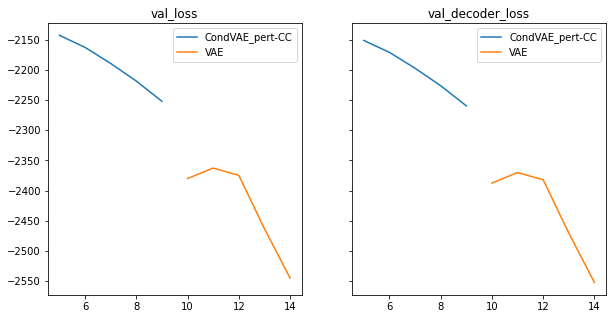

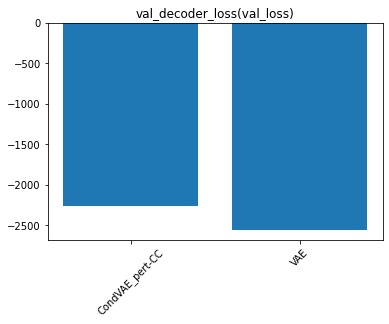

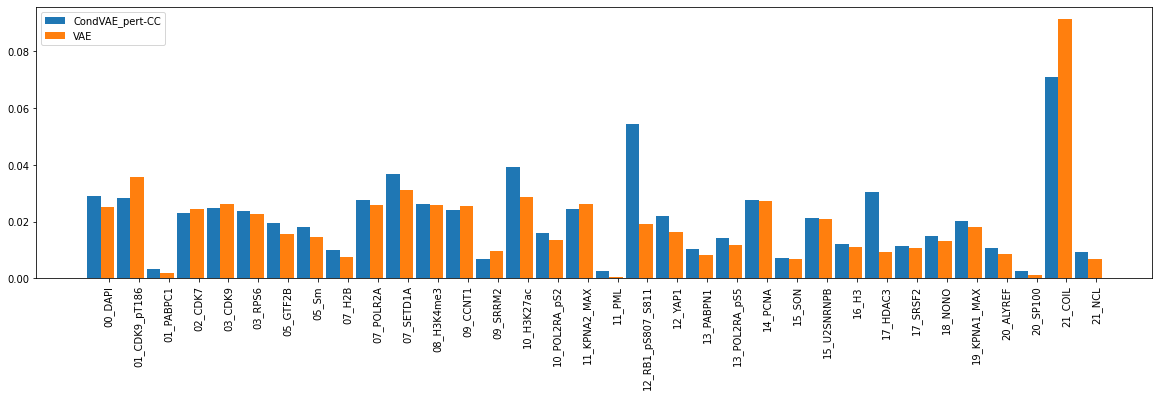

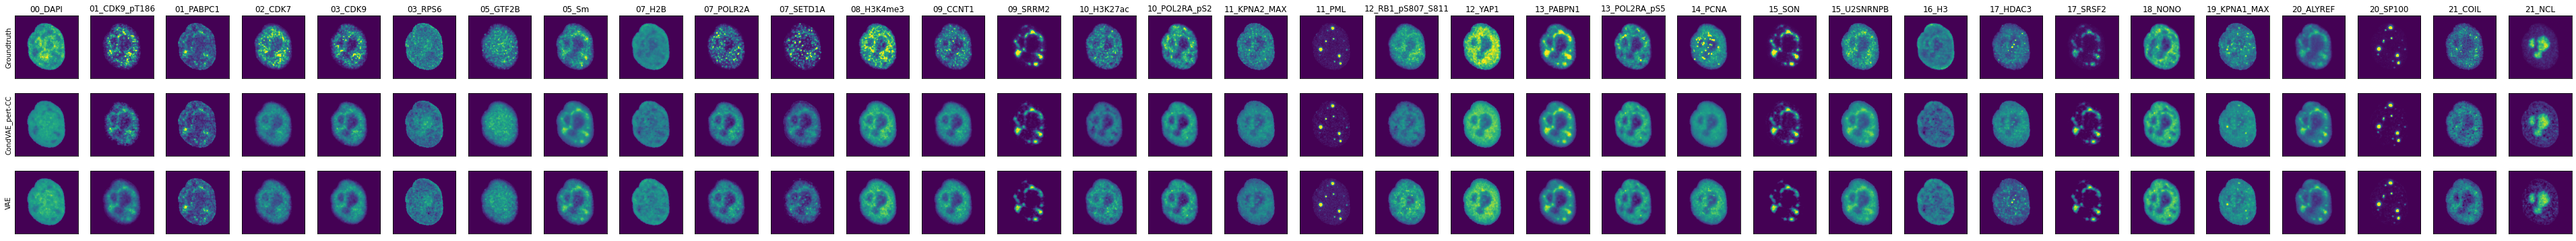

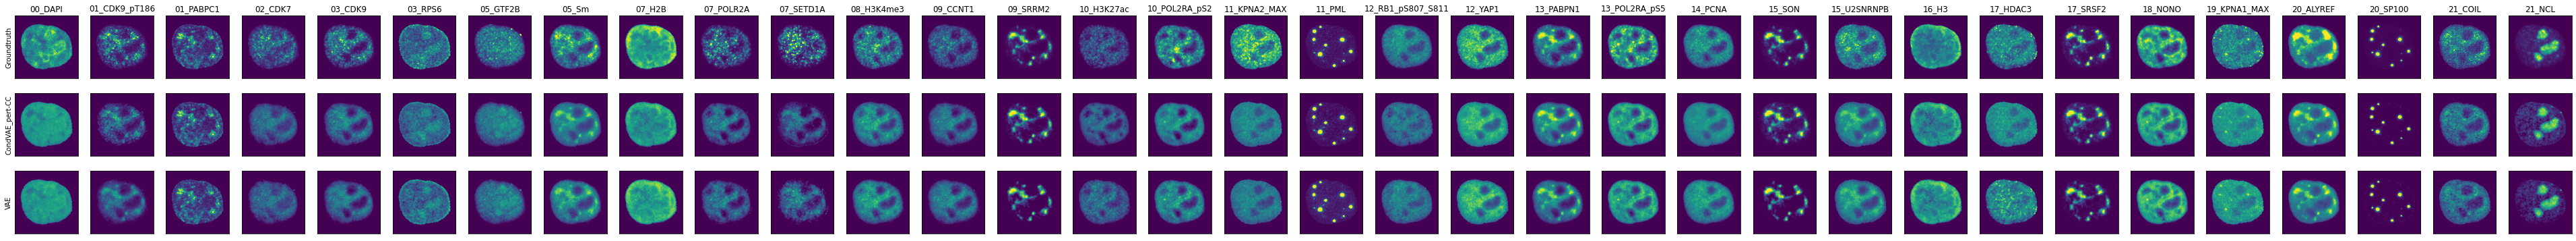

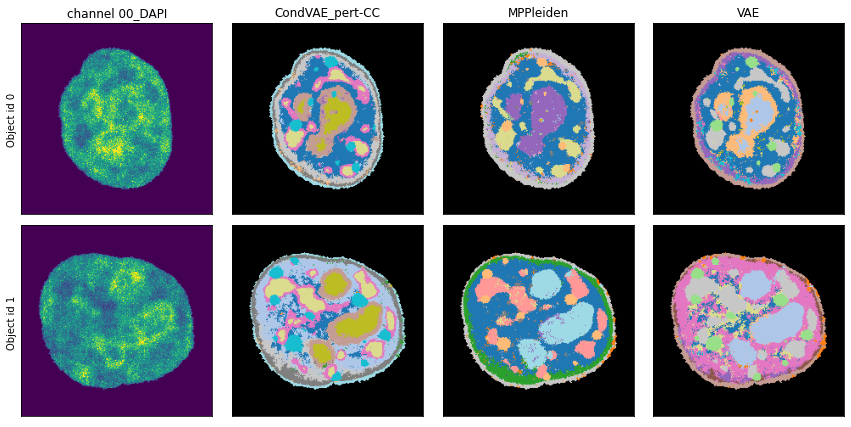

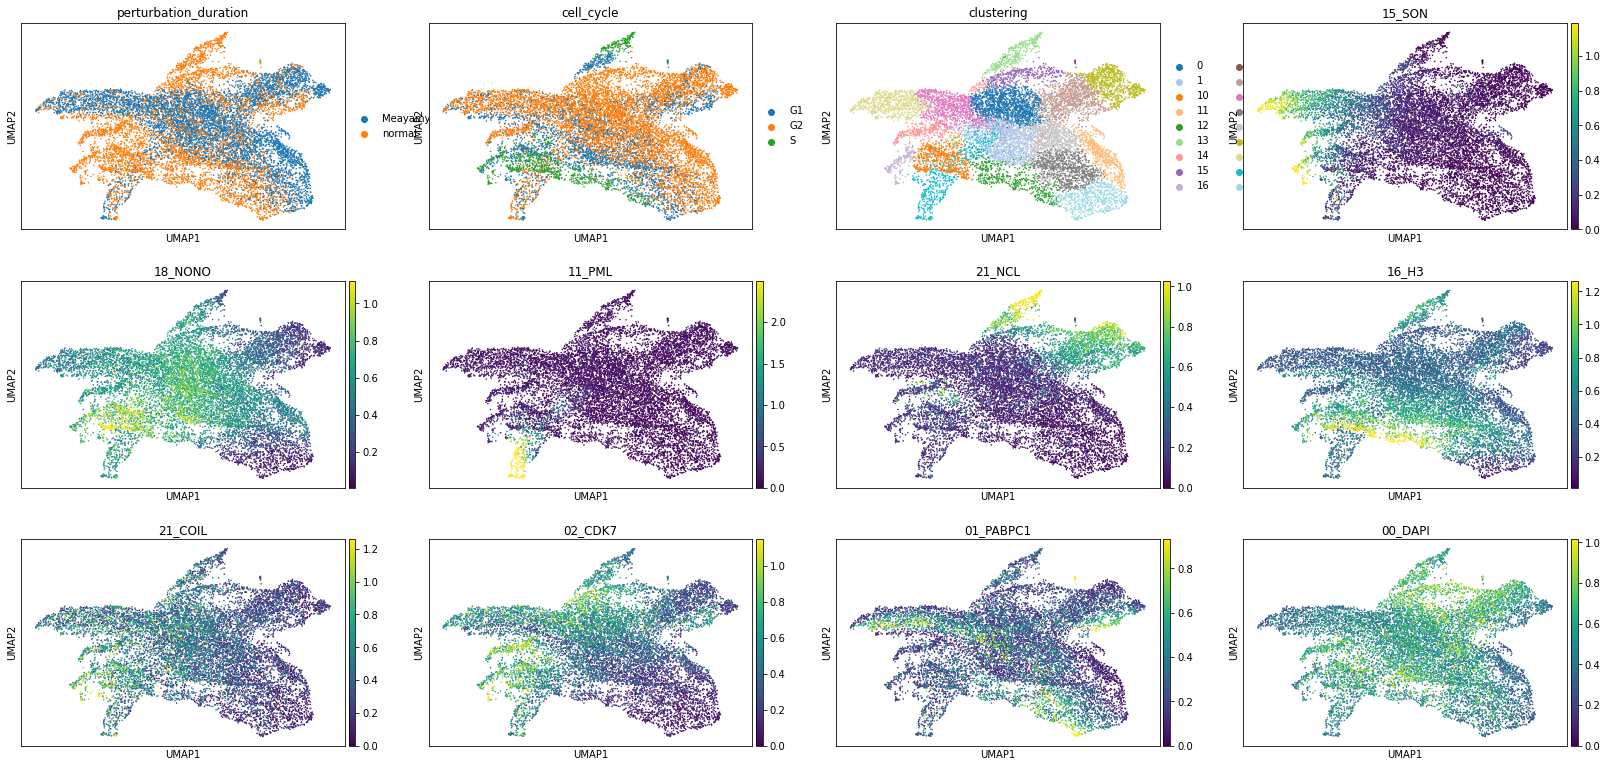

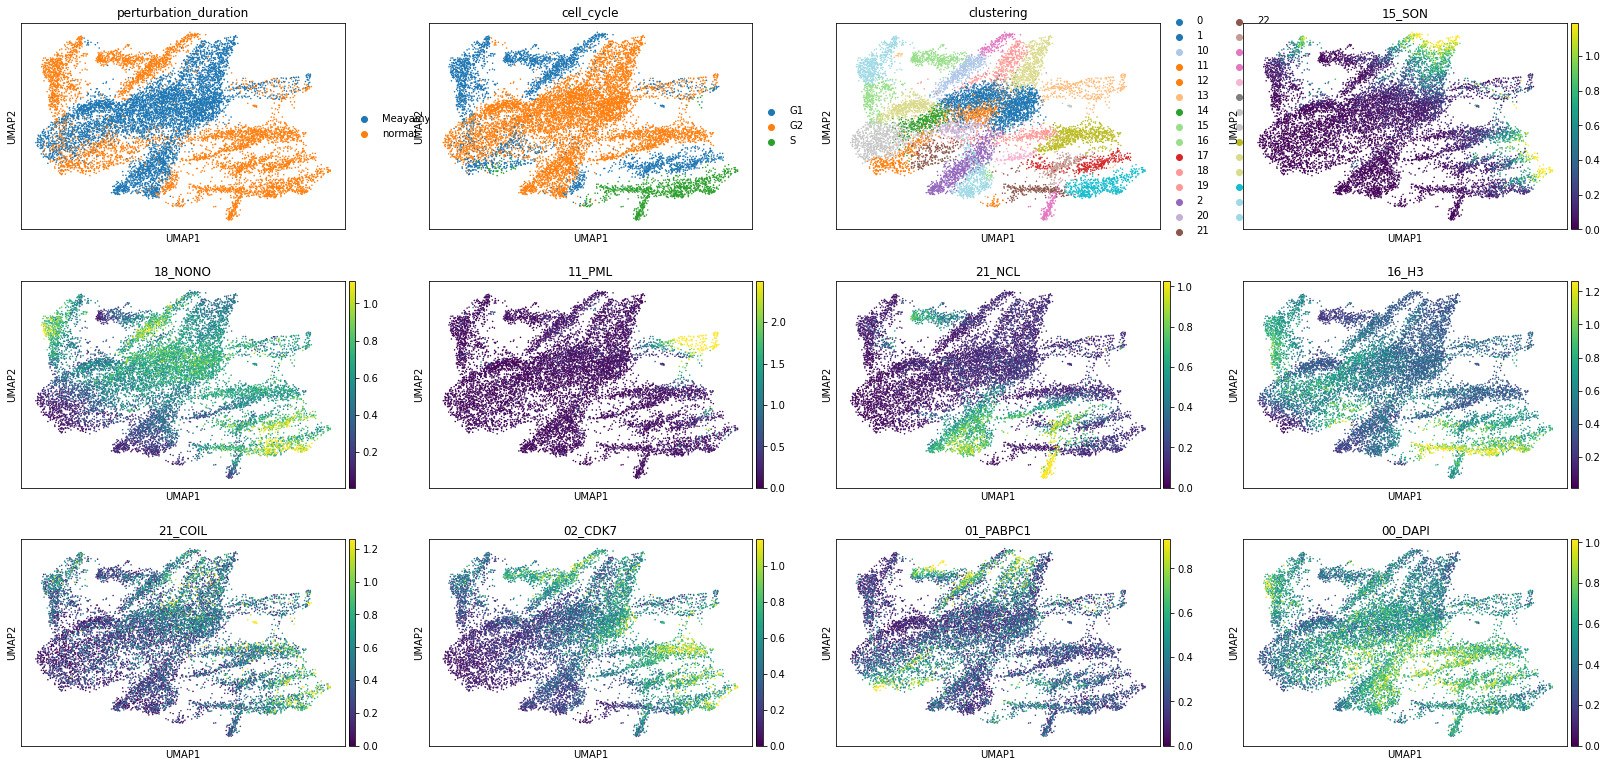

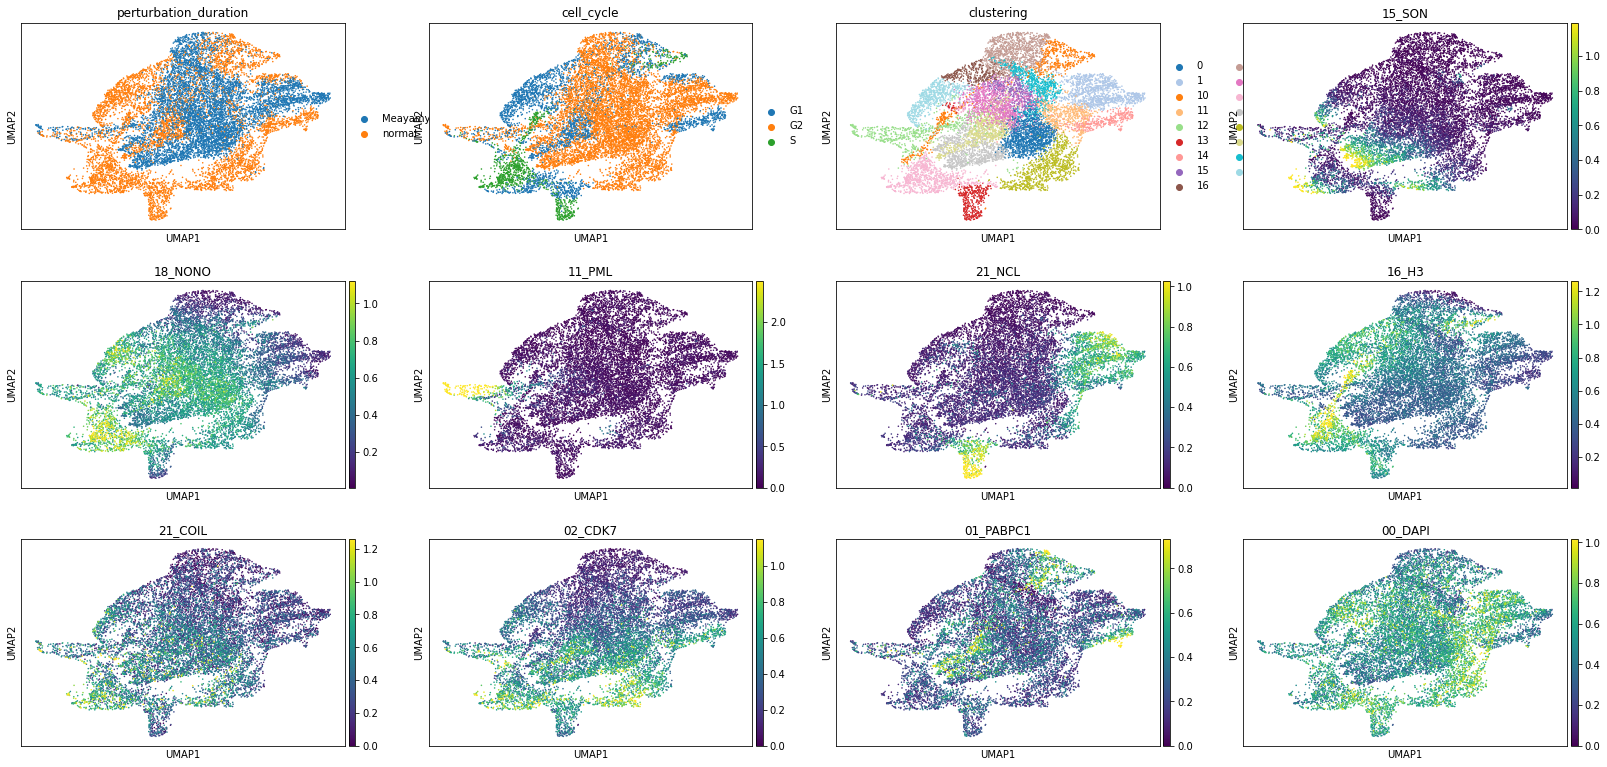

In [16]:
comp.plot_history(values=["val_loss", "val_decoder_loss"])
comp.plot_final_score(score="val_decoder_loss", fallback_score="val_loss", save_prefix="decoder_loss_")
comp.plot_per_channel_mse()
comp.plot_predicted_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)
comp.plot_cluster_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)
comp.plot_umap()

In [19]:
comp.exps.keys()

dict_keys(['CondVAE_pert-CC', 'MPPleiden', 'VAE'])